In [1]:
##
## 0. Import packages 

import sys                                         # Python ≥3.5 is required
assert sys.version_info >= (3, 5)
import sklearn                              # Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"
                                                            # Common imports
import tkinter as tk  
from tkinter import filedialog
from tkinter import *      
    
import pandas as pd                                #Pandas (data management)
import datetime
import numpy as np                                 #Numpy (math operatiomns)
import os                                    #OS for operating system access
import pickle                                                    # To pickle
                                                    
%matplotlib inline                               
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator) 
                 
import warnings            # Ignore useless warnings (see SciPy issue #5998)
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

import io
import requests

In [2]:
## 1. Define local functions

def initiate_state_info(stateslist,countryIndex):
    global cname, ccode, cfips
    cname = stateslist[countryIndex][0] 
    ccode = stateslist[countryIndex][1] 
    cfips = int(stateslist[countryIndex][2])
    
def get_country(df1,ccode) :
    global country
    country = df1[df1['state'] == ccode].copy()   #create df1 for this state
    return country

def get_PM(pop) :
    global PM
    PM = round(pop/1_000_000, 3)
    return PM

def get_pop(ccode) :
    global pop, df2, cfips
    pap = df2['POPESTIMATE2019'][df2['STATE'] == cfips]  #creates df with pop value
    pop = pap.values[0]                                  #extract the value
    return pop
  
def getPKLfilename():
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "../../PKL/WHO/",
                 title = "Select file",
                 filetypes = ((".pkl files","*.pkl"),("all files","*.*")))
    print (root.filename)
    return(root.filename)

In [3]:
##  Read raw dataframes df1 (covid data per country) and df2 (census data per state) 
##  from internet and store locally (pickle) when required
today = datetime.date.today().strftime("%Y-%m-%d") 

question = "Read from file pickle or from .csv sources on internet ...\n" 
txt      = 'MAY REQUIRE A CONSIDERABLE TIME SPAN ....  yes/no? :'

http0 = 'https://covid19.who.int/WHO-COVID-19-global-data.csv' ##  data          ##
cols0 = ['Date_reported','Country_code','New_cases','Cumulative_cases',
         'New_deaths','Cumulative_deaths']
                   ## Date_reported,Country_code,Country,WHO_region,
                   ## New_cases,Cumulative_cases,New_deaths,Cumulative_deaths

#pop1  = 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/'
#pop2  = "/CSV_FILES/WPP2019_TotalPopulationBySex.csv"  
#http2 = pop1 + pop2                                             ##  poputations   ##
#cols2 = ['Location','Time','PopMale','PopFemale','PopTotal','PopDensity']
                   ##  LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,
                   ##  PopFemale,PopTotal,PopDensity
yes   = input(question + txt) 

if yes == "yes":
    df = pd.read_csv(http0,header =0,low_memory=False,squeeze=False,delimiter = ',',usecols=cols0)
    df.columns = ['date','ccode','NewC','C','newD','D']
    df.fillna(0)
    df.to_pickle("../../PKL/WHO/"+today+".pkl")                      #Write to pickled file
else:        
    df = pd.read_pickle(getPKLfilename())
    df.info()                              
    
print('\n ....   ready  ....\n')  ###

CoNaPo =([['AL','Albania','2877.800'], ['DZ','Algeria','43851.043'], ['AS','Am-Samoa','55.197'], 
          ['AD','Andorra','77.265'], ['AO','Angola','32866.268'], ['AI','Anguilla','15.002'], 
          ['AG','Antigua','97.928'], ['AR','Argentina','45195.777'], ['AM','Armenia','2963.234'], 
          ['AW','Aruba','106.766'], ['AU','Australia','25499.881'], ['AT','Austria','9006.400'], 
          ['AZ','Azerbaijan','10139.175'], ['BS','Bahamas','393.248'], ['BH','Bahrain','1701.583'], 
          ['BD','Bangladesh','164689.383'], ['BB','Barbados','287.371'], ['BY','Belarus','9449.321'], 
          ['BE','Belgium','11589.616'], ['BZ','Belize','397.621'], ['BJ','Benin','12123.198'], 
          ['BM','Bermuda','62.273'], ['BT','Bhutan','771.612'], ['BO','Bolivia','11673.021'], 
          ['BQ','Bonaire+','26.221'], ['BA','Bosnia&H','3280.815'],['BW','Botswana','2351.625'], 
          ['BR','Brazil','212559.409'], ['BN','Brunei+','437.483'], ['BG','Bulgaria','6948.445'], 
          ['BF','BurkiFa','20903.278'], ['BI','Burundi','11890.781'], ['KH','Cambodia','16718.971'], 
          ['CM','Cameroon','26545.864'], ['CA','Canada','37742.157'], ['KY','Caymans','65.720'], 
          ['CF','CentrAfrR','4829.764'], ['TD','Chad','16425.859'], ['CL','Chile','19116.209'], 
          ['CN','China','1439323.774'], ['CO','Colombia','50882.884'],['ES','Spain','45940.000'], 
          ['KM','Comoros','869.595'], ['CG','Congo','5518.092'], ['CK','Cook-Isls','17.564'], 
          ['CR','CostaRica','5094.114'], ['CI','CôtedIv','26378.275'], ['HR','Croatia','4105.268'],
          ['CU','Cuba','11326.616'], ['CW','Curaçao','164.100'], ['CY','Cyprus','1207.361'], 
          ['CZ','CzechRep','10690.000'], ['DK','Denmark','5792.203'], ['DJ','Djibouti','988.002'],
          ['DM','Dominica','71.991'], ['DO','DominicR','10847.903'], ['EC','Ecuador','17643.060'], 
          ['EG','Egypt','102334.403'], ['SV','ElSalva','6486.201'], ['GQ','EqGuinea','1402.985'], 
          ['ER','Eritrea','3546.427'], ['EE','Estonia','1326.539'], ['ET','Ethiopia','114963.583'],
          ['FK','Malvinas','3.483'], ['FO','Faroers','48.865'], ['FJ','Fiji','896.444'], 
          ['FI','Finland','5540.718'], ['FR','France','65273.512'], ['GF','FrGuiana','298.682'], 
          ['PF','FrPolyn','280.904'], ['GA','Gabon','2225.728'], ['GM','Gambia','2416.664'], 
          ['GE','Georgia','3989.175'], ['DE','Germany','83783.945'], ['GH','Ghana','31072.945'], 
          ['GI','Gibraltar','33.691'], ['GL','Greenland','56.772'], 
          ['GD','Grenada','112.519'], ['GP','Guadeloupe','400.127'], ['GU','Guam','168.783'], 
          ['GT','Guatemala','17915.567'], ['GG','Guernsey','67.052'], ['GN','Guinea','13132.792'],
          ['GW','Gui-Bissau','1967.998'], ['GY','Guyana','786.559'], ['HT','Haiti','11402.533'], 
          ['HN','Honduras','9904.608'], ['HK','Hong-Kong','7451.000'], ['HU','Hungary','9660.350'],
          ['IS','Iceland','341.250'], ['IN','India','1380004.385'], ['ID','Indonesia','273523.621'], 
          ['IR','Iran','83992.949'], ['IQ','Iraq','40222.503'], ['IE','Ireland','4937.796'], 
          ['IM','IsleofMan','85.032'], ['IL','Israel','8655.541'], ['IT','Italy','60461.828'], 
          ['JM','Jamaica','2961.161'], ['JP','Japan','126476.458'], ['JE','Jersey','173.863'], 
          ['JO','Jordan','10203.140'], ['KZ','Kazakhstan','18776.707'], ['KE','Kenya','53771.3'], 
          ['KI','Kiribati','119.446'],['KP','North-Korea','25778.816'],['KR','South-Korea','51269.185'],
          ['KW','Kuwait','4270.563'], ['KG','Kyrgyzstan','6524.191'], ['LA','Laos','7275.556'], 
          ['LV','Latvia','1886.202'], ['LB','Lebanon','6825.442'], ['LS','Lesotho','2142.252'], 
          ['LR','Liberia','5057.677'], ['LY','Libya','6871.287'], ['LI','Liechtenstein','38.137'],
          ['LT','Lithuania','2722.291'], ['LU','Luxembourg','625.976'], ['MO','Macao','649.335'], 
          ['MK','N-Macedonia','2083.374'],['MG','Madagascar','27691.019'],['MW','Malawi','19129.955'],
          ['MY','Malaysia','32365.998'], ['MV','Maldives','540.542'], ['ML','Mali','20250.834'], 
          ['MT','Malta','441.539'], ['MH','Marshall-s','59.194'], ['MQ','Martinique','375.265'], 
          ['MR','Mauritania','4649.660'], ['MU','Mauritius','1271.767'],['YT','Mayotte','272.813'],
          ['MX','Mexico','128932.753'], ['MD','Moldova','4033.963'], ['MC','Monaco','39.244'], 
          ['MN','Mongolia','3278.292'], ['ME','Montenegro','628.062'], ['MS','Montserrat','4.999'],
          ['MA','Morocco','36910.558'],['MZ','Mozambique','31255.435'],['MM','Myanmar','54409.794'],
          ['NR','Nauru','10.834'], ['NP','Nepal','29136.808'], ['NL','Netherlands','17134.873'], 
          ['NC','NewCaled','285.491'], ['NZ','NewZealnd','4822.233'], ['NI','Nicaragua','6624.554'],
          ['NE','Niger','24206.636'], ['NG','Nigeria','206139.587'], ['NO','Norway','5421.242'], 
          ['OM','Oman','5106.622'], ['PK','Pakistan','220892.331'], ['PS','Palestine','5159.000'],
          ['PA','Panama','4314.768'], ['PG','PapuaNG','8947.027'], ['PY','Paraguay','7132.530'], 
          ['PE','Peru','32971.846'], ['PH','Philippines','109581.085'], ['PL','Poland','37846.605'],
          ['PT','Portugal','10196.707'], ['PR','PuertoRico','2860.840'], ['QA','Qatar','2881.060'],
          ['RE','Réunion','895.308'], ['RO','Romania','19237.682'], ['RU','Russia','145934.460'],
          ['RW','Rwanda','12952.209'], ['BL','StBarthé','9.885'], ['KN','StKitts+','53.192'], 
          ['LC','StLucia','183.629'], ['MF','StMartin','38.659'], ['PM','StPierre','5.795'], 
          ['VC','StVincnt','110.947'], ['WS','Samoa','198.410'], ['SM','SanMarino','33.938'], 
          ['ST','SaoTome','219.161'], ['SA','SaudiArabia','34813.867'], ['SN','Senegal','16743.93'],
          ['RS','Serbia','8737.370'], ['SC','Seychelles','98.340'], ['SL','SierraLeone','7976.985'],
          ['SG','Singapore','5850.343'],['IS','Iceland','341.250'], ['BS','Bahamas','393.248'], 
          ['SK','Slovakia','5464.000'],['SI','Slovenia','2081.000'],['UY','Uruguay','3449.000'],
          ['AG','Antigua','97.928'], ['SS','SouthSudan','11193.729'], ['SE','Sweden','10099.270'],
          ['SL','SierraLeone','7976.985'], ['SD','Sudan','43849.269'], ['SR','Suriname','586.634'],
          ['SZ','Swaziland','1640.000'], ['SE','Sweden','10099.270'], ['CH','Switzerland','8654.618'],
          ['SY','Syria','17500.657'], ['TW','Taiwan','23570.000'], ['TJ','Tajikistan','9537.642'], 
          ['TZ','Tanzania','59734.218'],['TH','Thailand','69799.978'],['TL','Timor-L','1318.442'],
          ['TG','Togo','8278.737'], ['TK','Tokelau','1.350'], ['TO','Tonga','105.697'], 
          ['TT','Trinidad&','1399.491'], ['TN','Tunisia','11818.618'], ['TR','Turkey','84339.067'],
          ['TM','Turkmnstn','6031.187'],['UG','Uganda','45741.000'],['UA','Ukraine','43733.759'], 
          ['AE','Emirates','9890.400'], ['US','USA','331002.651'],['LK','Sri Lanka','21670.000'], 
          ['UY','Uruguay','3473.727'], ['UZ','Uzbkstn','33469.199'], ['VU','Vanuatu','307.150'], 
          ['VE','Venezuela','27950.000'], ['VN','VietNam','97338.583'], ['EH','WSahara','597.33'],
          ['YE','Yemen','29825.967'], ['ZM','Zambia','18383.956'], ['ZW','Zimbabwe','14862.927'],
          ['ZA','South Africa','57780.000'],['SO','Somalia','15010.000'],['EL','Greece','10423.056'],
          ['GR','Greece','10423.056'],['GB','UK','67886.004'],['UK','UK','67886.004']])

#========================================================================

states = ['NL','BE','AT','DE','NO','SE','FR','IT','PT',
          'ES','PL','EE','LV','LT','IE','DK','CH','MT',
          'CY','CZ','SK','RO','BG','AL','BA','RS','SI', 
          'GR','GB'] # EUROPE ('EL','UK' in ECDC ) 

states = ['CA','US','MX','GT','NI','HN','CR','PA','JM','CU',
          'DO','HT','PR','VE','GF','SR','BR','CO','EC','PE',
          'BO','PY','UY','AR','CL'] # Americas

states = ['NZ','AU','PG','PH','SG','MY','LA','KH','VN','CN',
          'KR','JP'] # FarEast

states = ['ID','TH','MM','BD','BT','NP','IN','LK','PK','AF',
          'TJ','KG'] # India-env 

states = ['AM','AZ','GE','MD','UA','BY','RU','KZ','MN'] #Russia-env

states = ['TR','LB','SY','IL','EG','TN','LY','DZ',
          'MA','GI'] # Mediterranean

states = ['IR','IQ','JO','SA','SD','ER','DJ','ET','SO','YE',
          'OM','AE'] # Saudi-env

states = ['EH','MR','SN','GM','GW','GN','SL','BF','NE','TD', 
          'SS','CF','CM','BJ','NG','TG','GH','CI','LR','GQ',
          'GA','CD','CG','RW','UG','KE','TZ','MW','MZ',
          'MG','ZM','ZW','AO','NA','BW','ZA'] # Africa

#========================================================================

############   INSERT THE LIST WITH COUNTRY CODES TO INVESTIGATE 

states = ['NL','US','DE','GB','ZA','BR','IN','NZ','CN'] # India-env 


#========================================================================


Read from file pickle or from .csv sources on internet ...
MAY REQUIRE A CONSIDERABLE TIME SPAN ....  yes/no? :yes

 ....   ready  ....



**3. The loop**

length 426
olim 2020-01-03 news 2021-03-03
Which single country code? (give two-letter code or RETURN) ... :
Which week first? (give integer or ZERO) ... : 16
Which week last? (give integer or ZERO) ... : 0
Save plot? (yes/no) ...yes
Ratio to scale the number of cases (give integer-return) ... : 100
plot harmonized per million (yes/no) ...
slice_object slice(117, 425, 1)
title -  Netherlands - pop:17M - deaths:11,055 (=645 per M)
title -  China - pop:1,439M - deaths:202 (=0 per M)
  xfirst xlast      D  DpM         pop         name
1    117   425    202    0  1439323774        China
0    117   425  11055  645    17134873  Netherlands


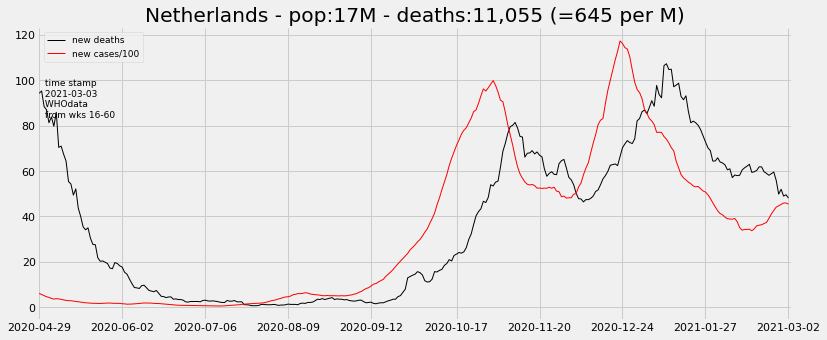

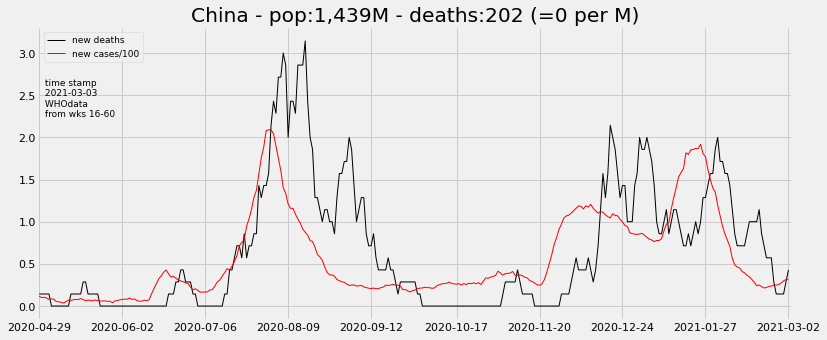

In [7]:
#========================================================================
############   INSERT THE LIST WITH COUNTRY CODES TO INVESTIGATE 
states = ['NL','BE','ES','IT','GB','DE','FR','CN','IL','IN','US','BR'] # ad hoc 
states = ['NL','CN'] # ad hoc 
#========================================================================
ccode   = 'CN'
country = df[df['ccode'] == ccode].copy()   # return country
dates   = country['date'].tolist()
length  = len(dates)
print('length',length)
olim    = dates[0]
news    = dates[-1]
print('olim',olim,'news',news)
stindex = pd.date_range(olim,news).strftime("%Y-%m-%d") 
IMR     = list()
IMP     = list()
countries = []
##---------------------------------------------------------------------------------
state = str(input('Which single country code? (give two-letter code or RETURN) ... :'))
if state != '':
    states = [state]
xfirst_i = 7 * int(input('Which week first? (give integer or ZERO) ... : ')) #####!!!!!$$$$$%%%
xlast_i  = 7 * int(input('Which week last? (give integer or ZERO) ... : '))  #####!!!!!$$$$$%%%
days     = 7 ##int(input('How many days smoothing range? (give integer-return) ... : '))
saveplot = input('Save plot? (yes/no) ...') 
if saveplot != "yes" :
    saveplot = "no"
ratio    = int(input('Ratio to scale the number of cases (give integer-return) ... : '))
perMillion = input('plot harmonized per million (yes/no) ...')
if perMillion != "yes" :
    perMillion = "no"
##---------------------------------------------------------------------------------
if xlast_i > xfirst_i and xlast_i < length :
    xlast = xlast_i
else :
    xlast = length - 1
if xfirst_i < xlast and xfirst_i > 0 :
    xfirst = xfirst_i
else :
    xfirst = 0
##---------------------------------------------------------------------------------
xlen   = xlast - xfirst
xrest  = xlen % days
xfirst = xfirst + xrest
slice_object = slice(xfirst,xlast, 1)
print('slice_object', slice_object)
summary = pd.DataFrame(columns = ['xfirst','xlast','D','DpM','pop','name'])
##---------------------------------------------------------------------------------
##---------------------------------------------------------------------------------
for ccode in states :           # per state
    for j in CoNaPo :
        if j[0] != ccode :
            pass
        else :
            cname = j[1]
            popu = j[2]
            cpop = int(float(popu)*1000)
            pop = cpop          
            break
    ##---------------------------------------------------------------------------
    country = df[df['ccode'] == ccode].copy() 
    country.replace(np.nan, 0)    
    country.set_index('date')   # set  date as index for country
    country.reset_index(inplace = True) 
    ##---------------------------------------------------------------------------
    nD       = country['newD'].rolling(days).mean().replace(np.NaN,0)  ###!!!!!!!
    nD       = nD[slice_object]
    nC       = country['NewC'].rolling(days).mean().replace(np.NaN,0)  ###!!!!!!!
    nC       = nC[slice_object]
    ##---------------------------------------------------------------------------
    cdates   = country['date'].tolist()
    cdates   = cdates[slice_object]
    cdatef   = cdates[0]    
    cdatel   = cdates[-1] 
    clength  = len(cdates)
    cstindex = pd.date_range(cdatef,cdatel).strftime("%Y-%m-%d")
    ##---------------------------------------------------------------------------
    PM       = round(pop/1000000,3)  
    if perMillion == 'yes' :
        perM = PM   
        lab1 = 'new DpM' 
        lab2 = 'new CpM'   
    else :
        perM = 1     
        lab1 = 'new deaths' 
        lab2 = 'new cases'
    ##--------------------------------------------------------------------------------- 
    #ded       = int(country['D'][-1:])
    #dpm       = int(round(ded/PM,0))   
    cded     = country['D'].tolist()
    cded     = cded[slice_object]
    ded      = int(cded[-1] - cded[0])    
    dpm      = int(round(ded/PM,0)) 
    ##---------------------------------------------------------------------------------    
    now       = cdatef
    summary_length              = len(summary)
    to_append                   = [xfirst,xlast,ded,dpm,pop,cname]
    summary.loc[summary_length] = to_append  
    ##---------------------------------------------------------------------------------
    Dnew = []               ## adapt nD into Dnew
    for i in nD:
        Dnew.append(i/perM)
    np.nan_to_num(Dnew)
    Cnow = []               ## adapt nC into Cnow
    for i in nC:
        Cnow.append(i/perM)
    Cnew = []               ## adapt Cnow into Cnew 
    for i in Cnow:
        Cnew.append(i/ratio)
    ##---------------------------------------------------------------------------------
    ##---------------------------------------------------------------------------------
    mox  = max([max(Dnew),max(Cnew)])
    ypos = mox*5/7                                              ##----=================    
    xpos = 1                                                    ##----=================
    ##--------------------------------------------------------------------------------- 
    ##---------------------------------------------------------------------------------   
    ## P L O T                                        
    ##---------------------------------------------------------------------------------  
    plt.style.use('fivethirtyeight')                           
    ##---------------------------------------------------------------------------------  
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.rc('legend',fontsize=11)                                
    ##---------------------------------------------------------------------------------  
    title0 = cname+' - pop:'+f'{int(pop/1000000):,d}'+'M - deaths:'+f'{ded:,d}' 
    title1 = ' (=' +f'{dpm:,d}'+' per M)'                      
    title = title0 + title1
    print('title - ',title)                                  
    ##---------------------------------------------------------------------------------  
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 5),sharex=True)
    ax.set_title(title)
    lll=xlast-xfirst
    xxxx = [xfirst,xfirst+int(lll/4),xfirst+int(lll*2/4),xfirst+int(lll*3/4),xfirst+lll]    
    xxxx = [0,int(lll/9),int(lll*2/9),int(lll*3/9),int(lll*4/9),int(lll*5/9),
            int(lll*6/9),int(lll*7/9),int(lll*8/9),lll-1]    
    plt.xticks(xxxx)    
    ax.set_xlim(xfirst, xlast)    
    ax.set_xlim(0, lll) 
    ax.tick_params()     
    ax.plot(cdates, Dnew, color='black', label = lab1,linewidth=1)        #####!!!!!$$$$$%%%%%@@@@@
    ax.legend(fontsize = 9,loc = 'upper left')      
    ax.plot(cdates, Cnew, color='red', label = lab2+'/'+str(ratio),linewidth=1)   #####!!!!!$$$$$%%
    ax.legend(fontsize = 9,loc = 'upper left') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.text(xpos,ypos,' time stamp\n '+today+'\n WHOdata\n from wks '+str(int(xfirst/7))+'-'+str(int(xlast/7)),
            fontsize=9)   ##%%@@@@@
    if saveplot == 'yes' : 
        plt.savefig('../../PLOTS/WHO/'+cname+'-'+str(xfirst)+'-'+str(xlast)+'.png')                            
##---------------------------------------------------------------------------------
##---------------------------------------------------------------------------------    
summary.set_index('DpM')   # set  date as index for country
country.reset_index(inplace = True) 
summary = summary.sort_values(by ='DpM', axis=0, ascending=True, 
          inplace=False, kind='quicksort', na_position='first')
print(summary)
##---------------------------------------------------------------------------------

In [5]:
print(int(xfirst/7),int(xlast/7))

27 60
